You are a data analyst for an e-commerce company that collects thousands of customer reviews. Your goal is to uncover actionable insights by analyzing this unstructured text data. 
Specifically, you need to:
1. Determine the overall sentiment (positive, neutral, negative) of the reviews.
2. Identify common themes such as frequently mentioned product features or issues.
3. Recommend actionable improvements to enhance customer satisfaction based on your analysis.

In [8]:
## TODO 1 : Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords

# Sentiment Analysis
from textblob import TextBlob

# Word Frequency
from collections import Counter

# Text Vectorization
from sklearn.feature_extraction.text import CountVectorizer


# Download stopwords if needed
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [9]:
## TODO 2 : Load, clean and preprocess the raw review data from the CSV file.
amazon_df=pd.read_csv('https://gitlab.crio.do/me_notebook/me_jupyter_amazonfeedbackanalysis/-/raw/master/amazon_product_reviews.csv')
amazon_df.isnull().sum()
amazon_df=amazon_df.dropna()
amazon_df.isnull().sum()


id                     0
name                   0
asins                  0
brand                  0
categories1            0
categories2            0
reviews.dateAdded      0
reviews.doRecommend    0
reviews.numHelpful     0
reviews.rating         0
reviews.text           0
reviews.title          0
reviews.username       0
dtype: int64

/tmp/ipykernel_69/1897200847.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='reviews.rating', data=amazon_df, palette='Set2')


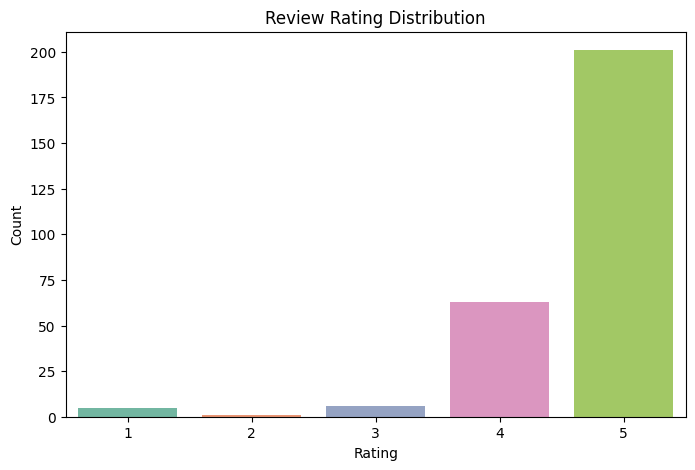

/tmp/ipykernel_69/1897200847.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='reviews.doRecommend',data=amazon_df, palette='pastel')


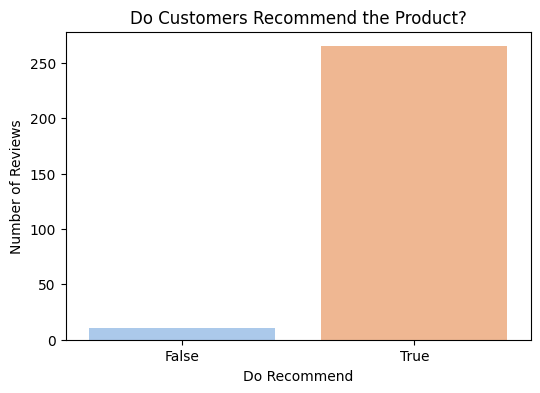

/tmp/ipykernel_69/1897200847.py:27: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  reviews_over_time = amazon_df.groupby(amazon_df['reviews.dateAdded'].dt.to_period('M')).size()


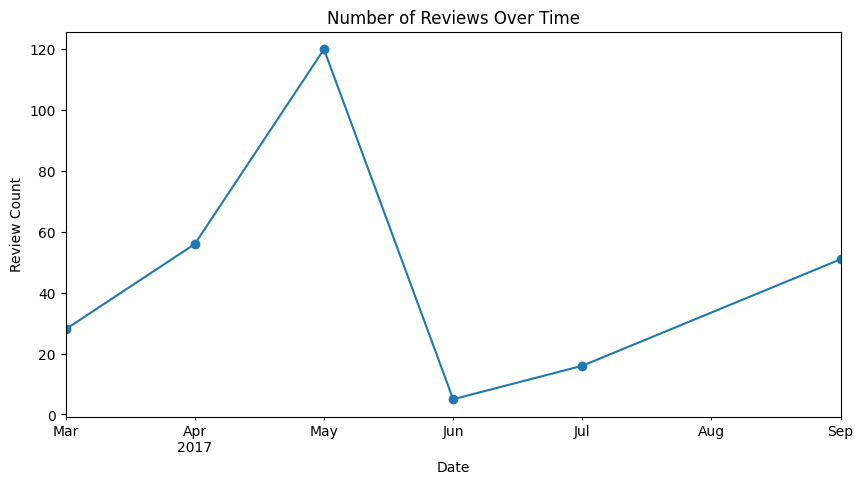

In [10]:
## TODO 3 : Perform exploratory data analysis (EDA) and visualize key trends using Matplotlib/Seaborn.
# amazon_df.describe()
# amazon_df.info()

#value_counts
#amazon_df['asins'].value_counts()
#amazon_df['reviews.rating'].value_counts()

#Review ratings
plt.figure(figsize=(8, 5))
sns.countplot(x='reviews.rating', data=amazon_df, palette='Set2')
plt.title('Review Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Amazon products is being recommended or not
plt.figure(figsize=(6, 4))
sns.countplot(x='reviews.doRecommend',data=amazon_df, palette='pastel')
plt.title('Do Customers Recommend the Product?')
plt.xlabel('Do Recommend')
plt.ylabel('Number of Reviews')
plt.show()

# review dates
amazon_df['reviews.dateAdded'] = pd.to_datetime(amazon_df['reviews.dateAdded'], errors='coerce')
reviews_over_time = amazon_df.groupby(amazon_df['reviews.dateAdded'].dt.to_period('M')).size()

reviews_over_time.plot(kind='line', figsize=(10, 5), marker='o')
plt.title('Number of Reviews Over Time')
plt.ylabel('Review Count')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.show()

In [12]:
# ## TODO 3 : Perform exploratory data analysis (EDA) and visualize key trends using Matplotlib/Seaborn.
# # Distribution of ratings
# plt.figure(figsize=(8,5))
# sns.countplot(data=df, x='reviews.rating', palette='coolwarm')
# plt.title("Distribution of Ratings")
# plt.xlabel("Rating")
# plt.ylabel("Count")
# plt.show()

# # Number of reviews per product
# top_products = df['name'].value_counts().head(10)
# plt.figure(figsize=(10,5))
# sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
# plt.title("Top 10 Products by Number of Reviews")
# plt.xlabel("Number of Reviews")
# plt.ylabel("Product Name")
# plt.show()

/tmp/ipykernel_69/3848035907.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=amazon_df, palette='Set2')


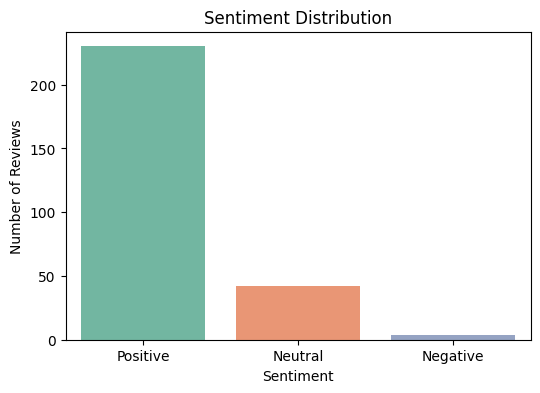

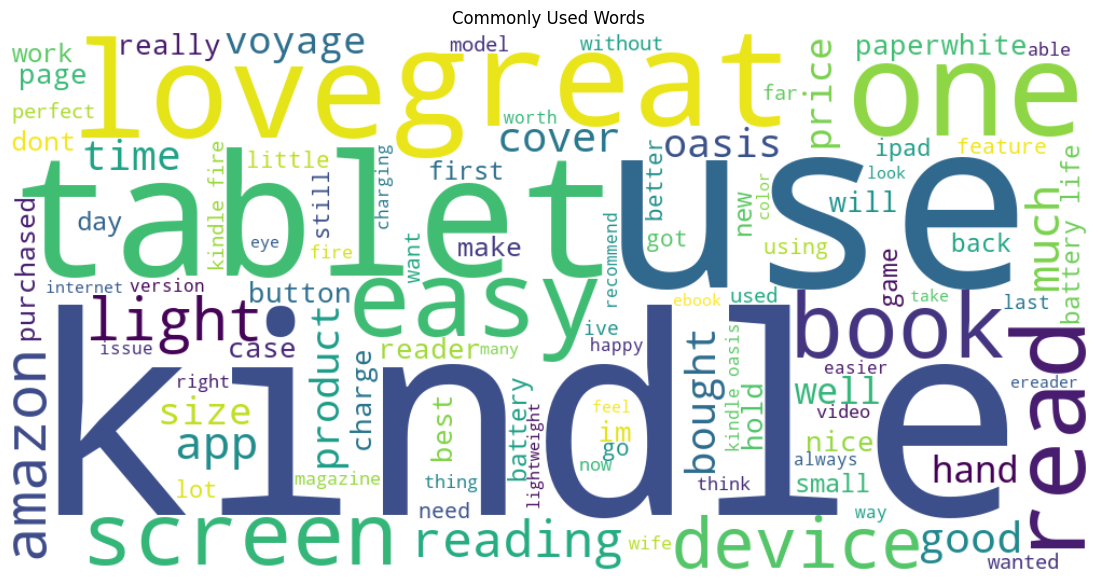

In [13]:
## TODO 4 : Do sentiment/text analysis on feedback column using prompts and create a wordcloud for the most repeated feedback.
# Clean the text: remove punctuation, digits, and convert to lowercase
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text

amazon_df['cleaned_reviews'] = amazon_df['reviews.text'].dropna().apply(clean_text)


# Calculate sentiment polarity using TextBlob
amazon_df['sentiment_polarity'] = amazon_df['cleaned_reviews'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Optional: Classify as Positive / Neutral / Negative
def classify_sentiment(score):
    if score > 0.1:
        return 'Positive'
    elif score < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

amazon_df['sentiment'] = amazon_df['sentiment_polarity'].apply(classify_sentiment)

# Visualize sentiment distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='sentiment', data=amazon_df, palette='Set2')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()



# Combine all cleaned reviews into one string
all_words = ' '.join(amazon_df['cleaned_reviews'])

# Create the WordCloud
wordcloud = WordCloud(width=1000, height=500, background_color='white', max_words=100).generate(all_words)

# Display the WordCloud
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Commonly Used Words')
plt.show()

/tmp/ipykernel_69/1044461262.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=words_df, palette='Reds_r')


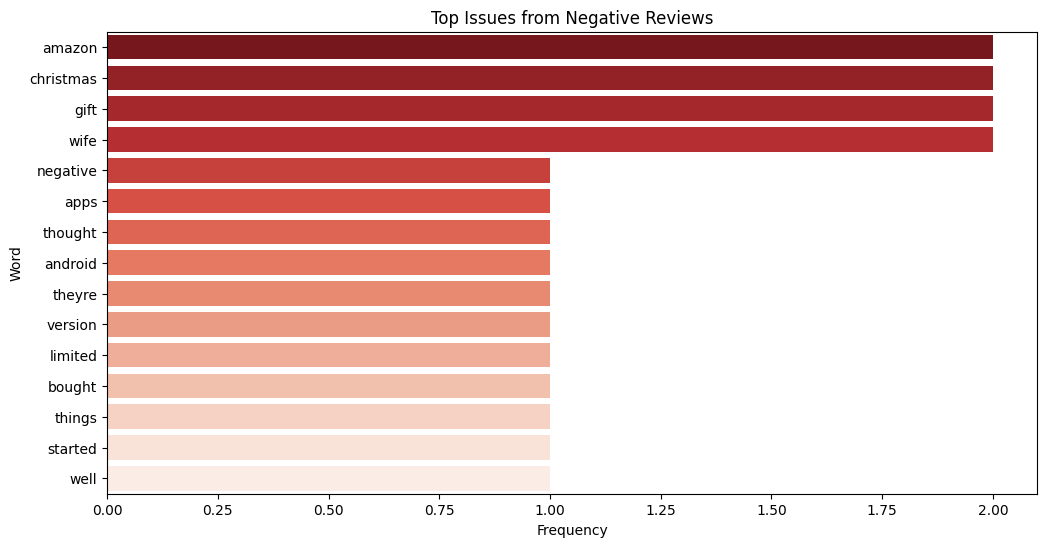

In [14]:
## TODO 5 : Creat a barplot showing the most frequent words in negative reviews

#filter negative comments
negative_reviews = amazon_df[amazon_df['sentiment'] == 'Negative']['cleaned_reviews']


#Clean, Tokenize, and Remove Stopwords
# Define stopwords
stop_words = set(stopwords.words('english'))

# Tokenize and clean
words = []
for review in negative_reviews:
    tokens = re.findall(r'\b[a-z]{2,}\b', review.lower())  # words with 2+ letters
    filtered = [word for word in tokens if word not in stop_words]
    words.extend(filtered)


# Count most common words
word_freq = Counter(words).most_common(15)  # Top 20
words_df = pd.DataFrame(word_freq, columns=['word', 'count'])


plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='word', data=words_df, palette='Reds_r')
plt.title('Top Issues from Negative Reviews')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()


In [7]:
#save